# TASK 2

# Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.
Dataset :- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [73]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [52]:
# load data
data=pd.read_csv("Mall_Customers.csv")

# ANALYZE DATA SET

In [53]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [54]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [55]:
data.shape

(200, 5)

In [56]:
data.keys()

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [57]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [58]:
# Cleaned dataset

# SELECT RELEVENT FEATURES FOR CLUSTERING

In [62]:
 x= data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# STANDARDIZE THE DATA

In [63]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# DETERMINE OPTIMAL NUMBER OF CLUSTERS BY ELBOW METHOD

In [64]:
# detrmine optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)



C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

# PLOT ELBOW METHOD GRAPH

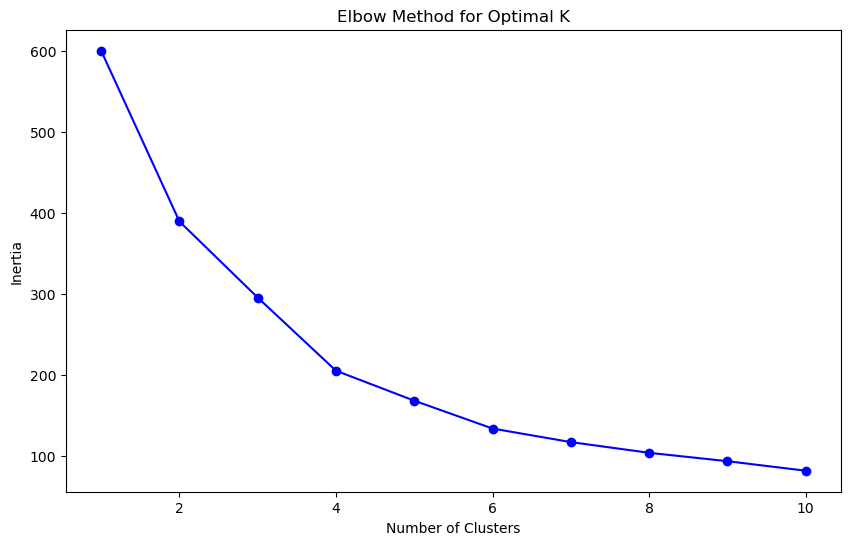

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# PERFORM K-MEAN CLUSTERING

In [68]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x_scaled)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [67]:
#get cluster centrs
labels = kmeans.labels_


In [69]:
#add cluster labels to original dataset
data['Cluster'] = labels


In [71]:
print(data.groupby('Cluster')['Age'].mean())
print(data.groupby('Cluster')['Annual Income (k$)'].mean())
print(data.groupby('Cluster')['Spending Score (1-100)'].mean())


Cluster
0    39.871795
1    25.185185
2    46.250000
3    55.638298
4    32.875000
Name: Age, dtype: float64
Cluster
0    86.102564
1    41.092593
2    26.750000
3    54.382979
4    86.100000
Name: Annual Income (k$), dtype: float64
Cluster
0    19.358974
1    62.240741
2    18.350000
3    48.851064
4    81.525000
Name: Spending Score (1-100), dtype: float64


# VISUALIZE THE CLUSTERS

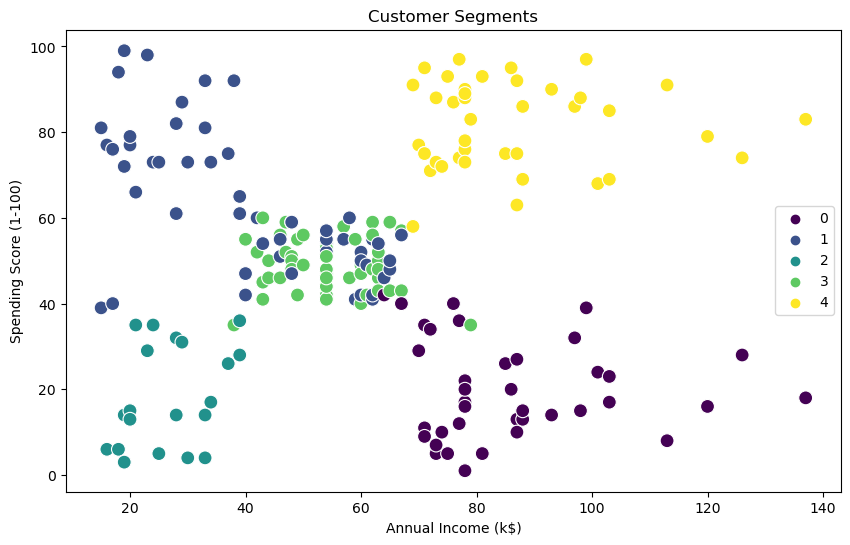

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# RESULT

# CLUSTER INTERPRETATION

#Cluster 0: Young, low-income customers with moderate spending habits

Cluster 1: Middle-aged, middle-income customers with high spending habits

Cluster 2: Old, high-income customers with low spending habits

Cluster 3: Young, high-income customers with very high spending habits

Cluster 4: Middle-aged, low-income customers with low spending habits


# INSIGHTS

- Target Cluster 3 with premium products and loyalty programs.
- Offer discounts to Cluster 4 to increase spending.
- Focus on Cluster 1 for high-value purchases.
